In [3]:
!pip install lightgbm --user
!pip install xgboost --user

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
sns.set()
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from matplotlib.image import imread
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('Aemf1.csv')

In [3]:
df.head() 

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677


In [4]:
df.shape

(41714, 19)

In [5]:
df.isnull().sum()

City                           0
Price                          0
Day                            0
Room Type                      0
Shared Room                    0
Private Room                   0
Person Capacity                0
Superhost                      0
Multiple Rooms                 0
Business                       0
Cleanliness Rating             0
Guest Satisfaction             0
Bedrooms                       0
City Center (km)               0
Metro Distance (km)            0
Attraction Index               0
Normalised Attraction Index    0
Restraunt Index                0
Normalised Restraunt Index     0
dtype: int64

In [6]:
train,test = train_test_split(df, test_size=0.2, random_state=123)

In [7]:
train.head()

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
17821,Lisbon,105.534709,Weekday,Private room,False,True,2.0,False,1,0,9.0,80.0,1,2.432855,0.372176,107.859268,3.560897,280.131751,12.528537
14000,Budapest,148.517178,Weekday,Entire home/apt,False,False,6.0,True,1,0,10.0,100.0,2,0.812401,0.314740,308.499864,18.397297,538.478795,40.775271
22548,Paris,1193.261255,Weekday,Entire home/apt,False,False,2.0,False,0,0,10.0,100.0,1,1.755184,0.101020,662.587212,32.254522,1332.239542,78.281779
2776,Athens,81.081714,Weekday,Entire home/apt,False,False,5.0,False,0,0,9.0,89.0,2,3.569007,0.183870,48.518362,1.829344,71.012747,5.332069
36738,Rome,237.065438,Weekend,Entire home/apt,False,False,6.0,True,0,1,9.0,100.0,3,5.654633,2.831358,205.279193,4.548052,594.676079,12.956549


In [8]:
#A1
train.reset_index(drop=True,inplace=True)

In [9]:
train.head()

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Lisbon,105.534709,Weekday,Private room,False,True,2.0,False,1,0,9.0,80.0,1,2.432855,0.372176,107.859268,3.560897,280.131751,12.528537
1,Budapest,148.517178,Weekday,Entire home/apt,False,False,6.0,True,1,0,10.0,100.0,2,0.812401,0.314740,308.499864,18.397297,538.478795,40.775271
2,Paris,1193.261255,Weekday,Entire home/apt,False,False,2.0,False,0,0,10.0,100.0,1,1.755184,0.101020,662.587212,32.254522,1332.239542,78.281779
3,Athens,81.081714,Weekday,Entire home/apt,False,False,5.0,False,0,0,9.0,89.0,2,3.569007,0.183870,48.518362,1.829344,71.012747,5.332069
4,Rome,237.065438,Weekend,Entire home/apt,False,False,6.0,True,0,1,9.0,100.0,3,5.654633,2.831358,205.279193,4.548052,594.676079,12.956549


In [10]:
df.dtypes

City                            object
Price                          float64
Day                             object
Room Type                       object
Shared Room                       bool
Private Room                      bool
Person Capacity                float64
Superhost                         bool
Multiple Rooms                   int64
Business                         int64
Cleanliness Rating             float64
Guest Satisfaction             float64
Bedrooms                         int64
City Center (km)               float64
Metro Distance (km)            float64
Attraction Index               float64
Normalised Attraction Index    float64
Restraunt Index                float64
Normalised Restraunt Index     float64
dtype: object

In [11]:
df['City'].unique()

array(['Amsterdam', 'Athens', 'Barcelona', 'Berlin', 'Budapest', 'Lisbon',
       'Paris', 'Rome', 'Vienna'], dtype=object)

In [12]:
df['Shared Room'].dtype

dtype('bool')

In [13]:
for i in df.columns:
    if df[i].dtype == 'O':
        print(f"{i} has {df[i].nunique()} categories\nThey are:\n{df[i].unique()}\n") 
        

City has 9 categories
They are:
['Amsterdam' 'Athens' 'Barcelona' 'Berlin' 'Budapest' 'Lisbon' 'Paris'
 'Rome' 'Vienna']

Day has 2 categories
They are:
['Weekday' 'Weekend']

Room Type has 3 categories
They are:
['Private room' 'Entire home/apt' 'Shared room']



In [14]:
#A2
train['Guest Satisfaction'] = train['Guest Satisfaction']/10

In [15]:
train.head(2)

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Lisbon,105.534709,Weekday,Private room,False,True,2.0,False,1,0,9.0,8.0,1,2.432855,0.372176,107.859268,3.560897,280.131751,12.528537
1,Budapest,148.517178,Weekday,Entire home/apt,False,False,6.0,True,1,0,10.0,10.0,2,0.812401,0.314740,308.499864,18.397297,538.478795,40.775271


In [16]:
#A3
train['Overall Rating'] = round((train['Cleanliness Rating'] + train['Guest Satisfaction'])/2,1)

In [17]:
train.head(2)

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index,Overall Rating
0,Lisbon,105.534709,Weekday,Private room,False,True,2.0,False,1,0,9.0,8.0,1,2.432855,0.372176,107.859268,3.560897,280.131751,12.528537,8.5
1,Budapest,148.517178,Weekday,Entire home/apt,False,False,6.0,True,1,0,10.0,10.0,2,0.812401,0.314740,308.499864,18.397297,538.478795,40.775271,10.0


In [18]:
def drop_outlier(data,var):
    q1, q3 = np.percentile(data[var], [25, 75])
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    data = data[data[var]< upper]
    data = data[data[var]> lower]
    data.reset_index(drop=True, inplace = True)
    return data

C:\Users\emmanul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

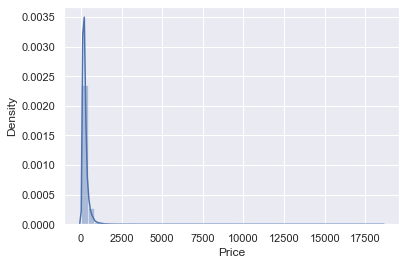

In [19]:
sns.distplot(train['Price'])

C:\Users\emmanul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

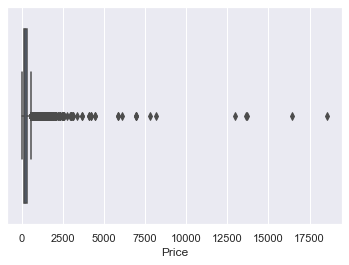

In [20]:
sns.boxplot(train['Price'])

In [21]:
#A4
train = drop_outlier(train,'Price')

C:\Users\emmanul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

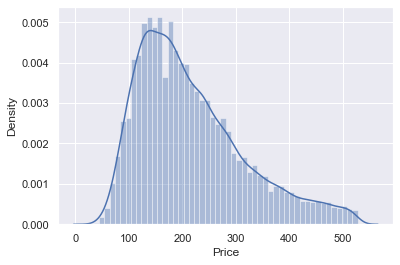

In [22]:
sns.distplot(train['Price'])

In [23]:
train.head()

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index,Overall Rating
0,Lisbon,105.534709,Weekday,Private room,False,True,2.0,False,1,0,9.0,8.0,1,2.432855,0.372176,107.859268,3.560897,280.131751,12.528537,8.5
1,Budapest,148.517178,Weekday,Entire home/apt,False,False,6.0,True,1,0,10.0,10.0,2,0.812401,0.314740,308.499864,18.397297,538.478795,40.775271,10.0
2,Athens,81.081714,Weekday,Entire home/apt,False,False,5.0,False,0,0,9.0,8.9,2,3.569007,0.183870,48.518362,1.829344,71.012747,5.332069,9.0
3,Rome,237.065438,Weekend,Entire home/apt,False,False,6.0,True,0,1,9.0,10.0,3,5.654633,2.831358,205.279193,4.548052,594.676079,12.956549,9.5
4,Rome,194.982816,Weekend,Entire home/apt,False,False,6.0,False,0,1,10.0,9.0,2,5.424464,0.370540,267.029014,5.916146,624.257060,13.601047,9.5


In [24]:
train.duplicated().sum()

0

In [25]:
col1 = train.columns

In [26]:
#A5


In [27]:
train.dtypes

City                            object
Price                          float64
Day                             object
Room Type                       object
Shared Room                       bool
Private Room                      bool
Person Capacity                float64
Superhost                         bool
Multiple Rooms                   int64
Business                         int64
Cleanliness Rating             float64
Guest Satisfaction             float64
Bedrooms                         int64
City Center (km)               float64
Metro Distance (km)            float64
Attraction Index               float64
Normalised Attraction Index    float64
Restraunt Index                float64
Normalised Restraunt Index     float64
Overall Rating                 float64
dtype: object

In [28]:
#A6
X_train = train.drop(['Price'],axis=1)
y_train = train['Price']

In [29]:
#A7
encoder = OneHotEncoder(drop='first',dtype=int)

enc_data = pd.DataFrame(encoder.fit_transform(X_train[['City','Day','Room Type','Shared Room','Private Room','Superhost']]).toarray())
enc_data.columns = encoder.get_feature_names_out()

X_train = X_train.join(enc_data)

X_train.drop(['City','Day','Room Type','Shared Room','Private Room','Superhost'], axis=1,inplace=True)



In [30]:
X_train

,Person Capacity,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,...,City_Lisbon,City_Paris,City_Rome,City_Vienna,Day_Weekend,Room Type_Private room,Room Type_Shared room,Shared Room_True,Private Room_True,Superhost_True
0,2.0,1,0,9.0,8.0,1,2.432855,0.372176,107.859268,3.560897,...,1,0,0,0,0,1,0,0,1,0
1,6.0,1,0,10.0,10.0,2,0.812401,0.314740,308.499864,18.397297,...,0,0,0,0,0,0,0,0,0,1
2,5.0,0,0,9.0,8.9,2,3.569007,0.183870,48.518362,1.829344,...,0,0,0,0,0,0,0,0,0,0
3,6.0,0,1,9.0,10.0,3,5.654633,2.831358,205.279193,4.548052,...,0,0,1,0,1,0,0,0,0,1
4,6.0,0,1,10.0,9.0,2,5.424464,0.370540,267.029014,5.916146,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31029,2.0,1,0,10.0,8.8,1,0.939441,0.269381,801.292760,27.309350,...,0,0,0,0,0,1,0,0,1,0
31030,2.0,0,0,10.0,9.8,0,1.515667,0.212149,216.827544,12.941119,...,0,0,0,0,1,0,0,0,0,1
31031,6.0,1,0,10.0,9.1,2,0.906417,0.579484,211.241397,6.973984,...,1,0,0,0,0,0,0,0,0,0
31032,2.0,0,0,9.0,9.3,1,2.131325,0.296881,274.574682,13.351214,...,0,1,0,0,1,0,0,0,0,0


In [31]:
X_train.shape

(31034, 27)

In [32]:
X_train.duplicated().sum()

0

In [33]:
col2 = X_train.columns 

In [34]:
#8
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)


In [35]:
X_train = pd.DataFrame(X_train, columns=col2)
X_train

,Person Capacity,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,...,City_Lisbon,City_Paris,City_Rome,City_Vienna,Day_Weekend,Room Type_Private room,Room Type_Shared room,Shared Room_True,Private Room_True,Superhost_True
0,0.00,1.0,0.0,0.875,0.7500,0.1,0.106196,0.027785,0.020526,0.026592,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.00,1.0,0.0,1.000,1.0000,0.2,0.034440,0.023471,0.065132,0.176343,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.75,0.0,0.0,0.875,0.8625,0.2,0.156506,0.013640,0.007333,0.009115,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.00,0.0,1.0,0.875,1.0000,0.3,0.248861,0.212522,0.042184,0.036556,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.00,0.0,1.0,1.000,0.8750,0.2,0.238669,0.027663,0.055912,0.050365,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31029,0.00,1.0,0.0,1.000,0.8500,0.1,0.040065,0.020063,0.174690,0.266297,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
31030,0.00,0.0,0.0,1.000,0.9750,0.0,0.065581,0.015764,0.044752,0.121272,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
31031,1.00,1.0,0.0,1.000,0.8875,0.2,0.038603,0.043359,0.043510,0.061042,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31032,0.00,0.0,0.0,0.875,0.9125,0.1,0.092843,0.022129,0.057590,0.125411,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

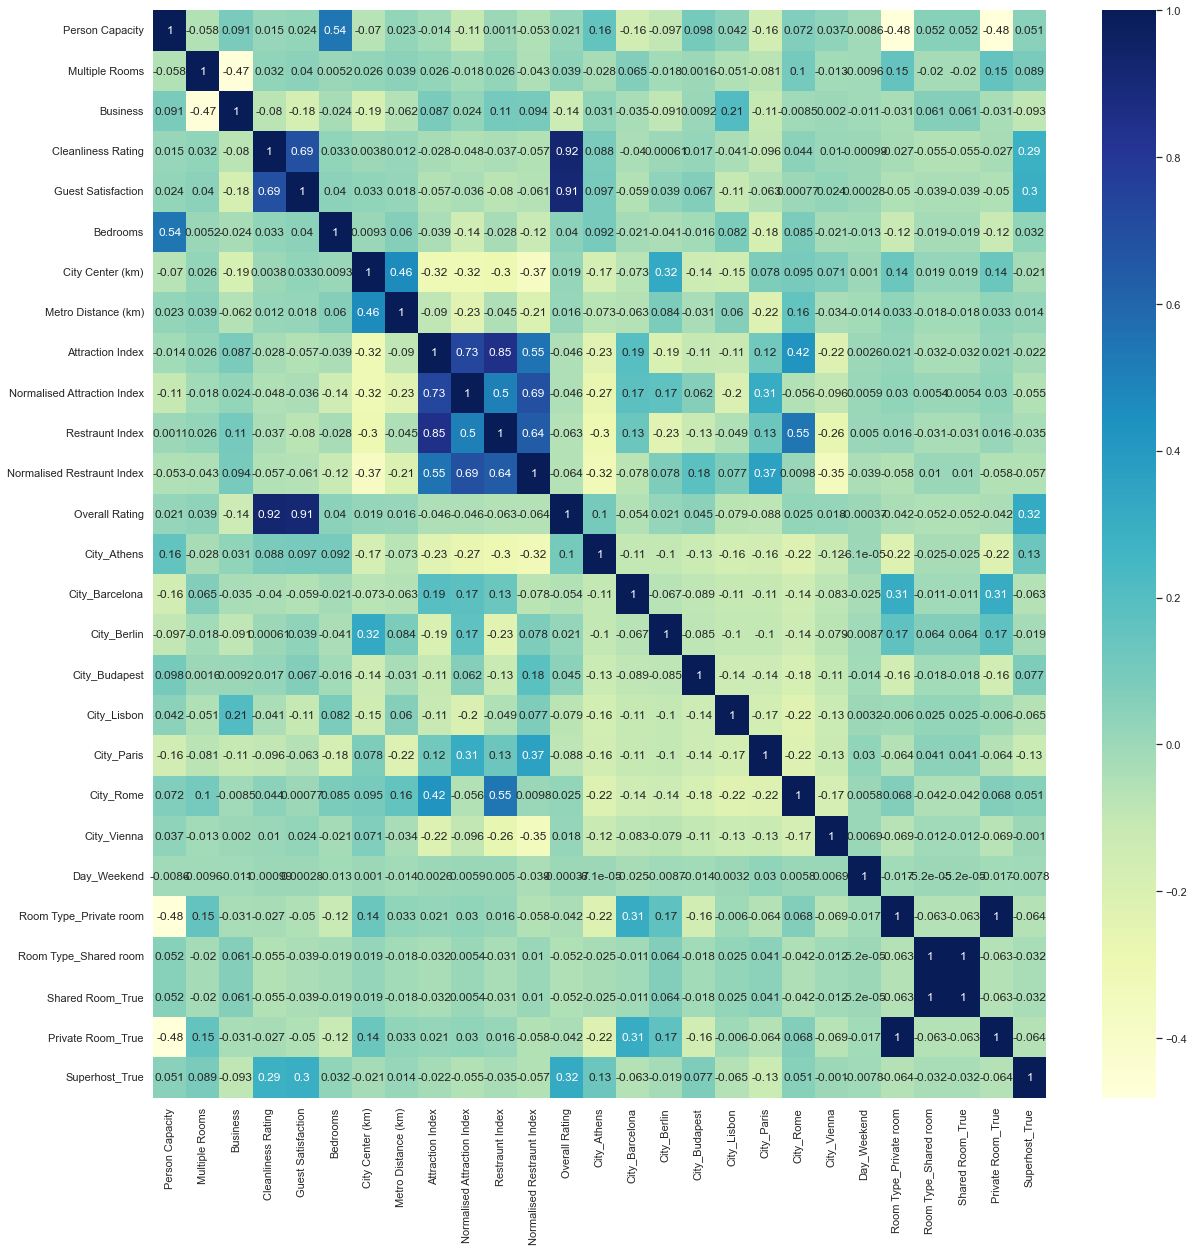

In [36]:
plt.figure(figsize=(20,20))
cors = X_train.corr()
sns.heatmap(cors, annot= True, cmap="YlGnBu")

<AxesSubplot:>

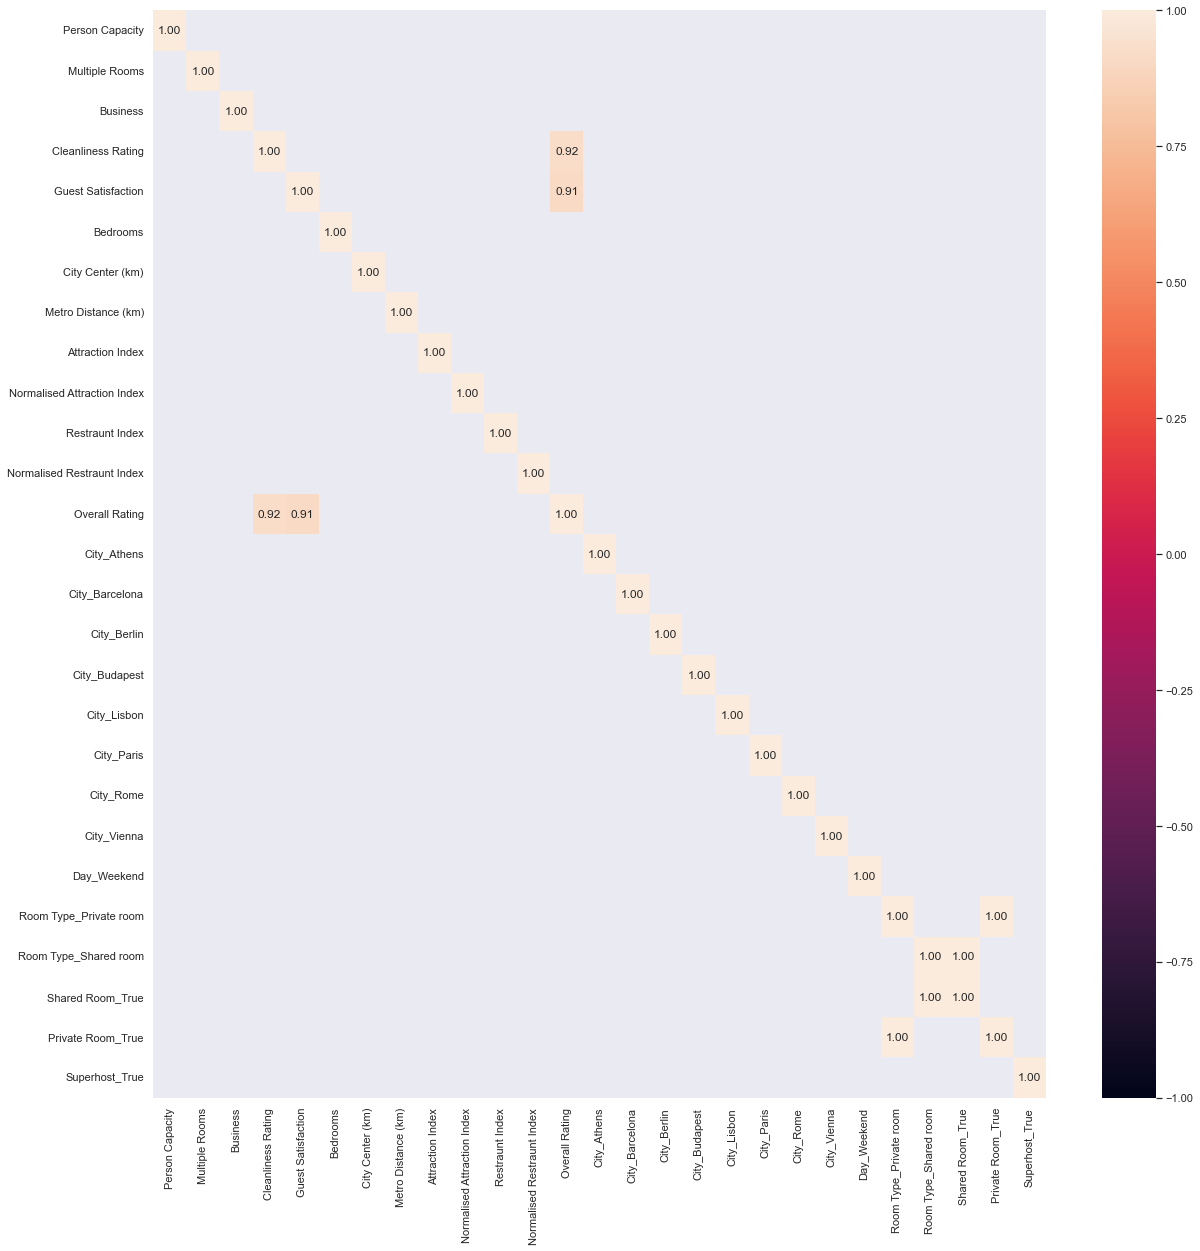

In [38]:
mask = cors[(cors >= 0.85)|(cors <= -0.85)]

plt.figure(figsize=(20,20))
sns.heatmap(mask, vmin=-1, vmax=1, annot=True, fmt='0.2f')

In [39]:
C = train.corr()['Price'].sort_values(ascending=False).drop('Price')
C 

Normalised Attraction Index    0.403286
Normalised Restraunt Index     0.368270
Attraction Index               0.298331
Restraunt Index                0.264193
Person Capacity                0.216135
Bedrooms                       0.149757
Business                       0.048891
Cleanliness Rating             0.010196
Overall Rating                 0.001958
Guest Satisfaction            -0.006634
Superhost                     -0.053190
Metro Distance (km)           -0.062288
Shared Room                   -0.077301
Multiple Rooms                -0.083078
City Center (km)              -0.093828
Private Room                  -0.242281
Name: Price, dtype: float64

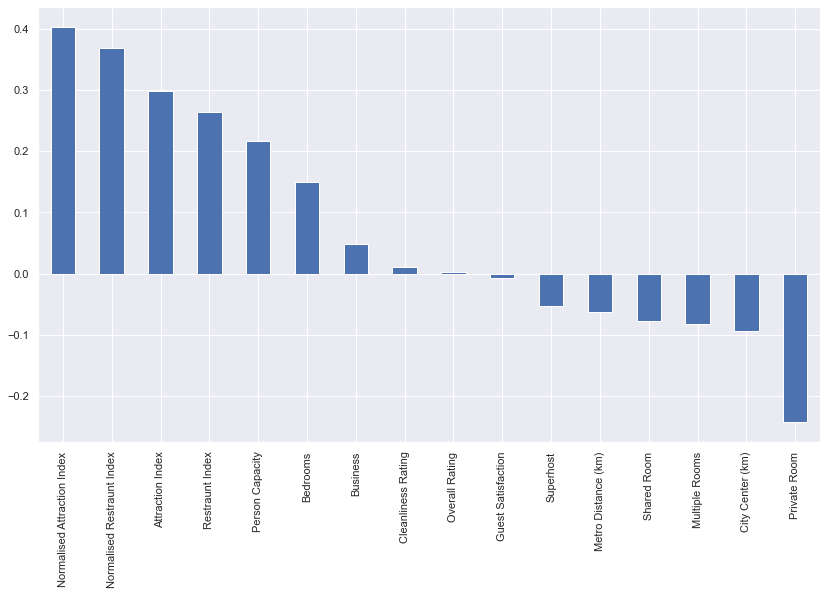

In [40]:
plt.figure(figsize=(14,8))
C.plot.bar()
plt.show()

In [42]:
decision_tree = DecisionTreeRegressor(max_depth = 10)
decision_tree.fit(X_train, y_train)
predictors = col2

coef = pd.Series(decision_tree.feature_importances_, predictors).sort_values(ascending=False)
coef.to_frame()

,0
Normalised Attraction Index,0.239489
Private Room_True,0.156987
City_Budapest,0.100981
City_Athens,0.070221
Bedrooms,0.065834
Attraction Index,0.053563
City_Rome,0.044945
Person Capacity,0.036747
Restraunt Index,0.033024
Normalised Restraunt Index,0.029449


<Figure size 1800x576 with 0 Axes>

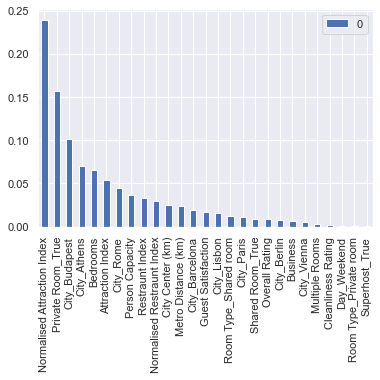

In [43]:
plt.figure(figsize=(25,8))
coef.to_frame().plot.bar(width=0.5)
plt.show()

In [44]:
#9
X_train.drop(['Cleanliness Rating','Guest Satisfaction'],axis=1,inplace=True)

In [45]:
def prepare(df):
    for i in df.columns:
        if df[i].dtype == 'bool':
            df[i] = df[i].astype(object)
    print(df.dtypes)
        
    df.reset_index(drop=True,inplace=True)
    df['Guest Satisfaction'] = df['Guest Satisfaction']/10
    df['Overall Rating'] = round((df['Cleanliness Rating'] + df['Guest Satisfaction'])/2,1)
    df = drop_outlier(df,'Price')
    X_test = df.drop(['Price'],axis=1)
    y_test = df['Price']
    
    enc_data = pd.DataFrame(encoder.transform(X_test[['City','Day','Room Type','Shared Room','Private Room','Superhost']]).toarray())
    enc_data.columns = encoder.get_feature_names_out()

    X_test = X_test.join(enc_data)

    X_test.drop(['City','Day','Room Type','Shared Room','Private Room','Superhost'], axis=1,inplace=True)
    
    col2 = X_test.columns
    
    X_test = scaler.transform(X_test)
    
    X_test = pd.DataFrame(X_test, columns=col2)
    
    X_test.drop(['Cleanliness Rating','Guest Satisfaction'],axis=1,inplace=True)
    
    return X_test,y_test
    

    
    

In [46]:
X_test,y_test = prepare(test)

City                            object
Price                          float64
Day                             object
Room Type                       object
Shared Room                     object
Private Room                    object
Person Capacity                float64
Superhost                       object
Multiple Rooms                   int64
Business                         int64
Cleanliness Rating             float64
Guest Satisfaction             float64
Bedrooms                         int64
City Center (km)               float64
Metro Distance (km)            float64
Attraction Index               float64
Normalised Attraction Index    float64
Restraunt Index                float64
Normalised Restraunt Index     float64
dtype: object


In [47]:
def model_to_use(input_ml_algo):
    if input_ml_algo == 'DT':
        model = DecisionTreeRegressor()
    elif input_ml_algo == 'RF':
        model = RandomForestRegressor()
    elif input_ml_algo == 'XGBC':
        model = XGBRegressor()
    elif input_ml_algo == 'LGBMC':
        model = LGBMRegressor()
    elif input_ml_algo=='LR':
        model=LinearRegression()
    elif input_ml_algo=='KNN':
        model=KNeighborsRegressor()
    return model

In [48]:
model_to_use('RF')

RandomForestRegressor()

In [49]:
def evaluate(model):
    y_train_pred = model.predict(X_train) #Train (Already seen this)
    y_pred = model.predict(X_test) 
    
    print('Train r2 score: ', r2_score(y_train,y_train_pred))
    print('Test r2 score: ', r2_score(y_test, y_pred))


    print('train_mse1: ', mean_squared_error(y_train,y_train_pred))
    print('test_mse1: ', mean_squared_error(y_test,y_pred))  

    plt.subplots(figsize=(8,5))
    plt.scatter(y_test,y_pred)
    plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)),c='r')
    plt.title('Predicted vs Actual')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.grid()
    plt.show()

Train r2 score:  0.576876788157426
Test r2 score:  0.5711640901955892
train_mse1:  4245.648750840722
test_mse1:  4215.439936549358


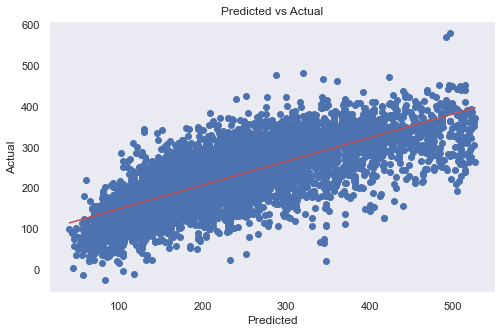

In [50]:
model1 = model_to_use("LR")
model1.fit(X_train, y_train)
evaluate(model1)

Train r2 score:  1.0
Test r2 score:  0.5759417264953528
train_mse1:  4.75034884216352e-30
test_mse1:  4168.475961751826


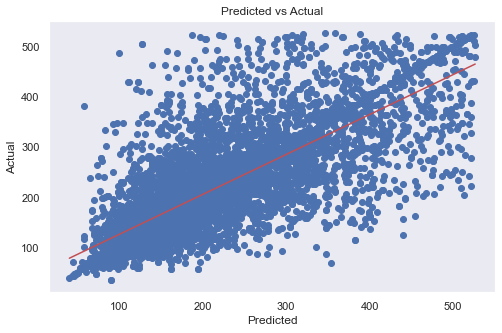

In [51]:
model2 = model_to_use("DT")
model2.fit(X_train, y_train)
evaluate(model2)

Train r2 score:  0.9674101433059155
Test r2 score:  0.7668896711068067
train_mse1:  327.00896686991024
test_mse1:  2291.4652611221586


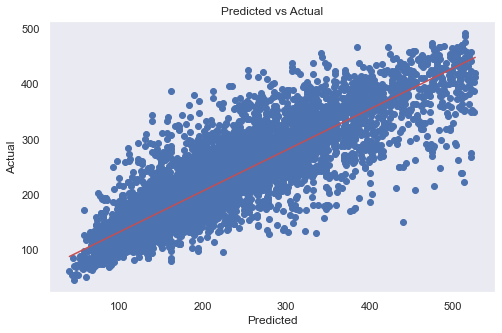

In [52]:
model3 = model_to_use("RF")
model3.fit(X_train, y_train)
evaluate(model3)

Train r2 score:  0.7210061182740555
Test r2 score:  0.5773430476711953
train_mse1:  2799.444682516415
test_mse1:  4154.7010303304505


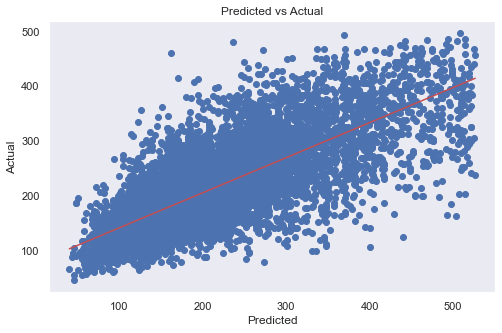

In [53]:
model4 = model_to_use("KNN")
model4.fit(X_train, y_train)
evaluate(model4)

Train r2 score:  0.7931414061285632
Test r2 score:  0.6886347851263339
train_mse1:  2075.634014136035
test_mse1:  3060.7076777440707


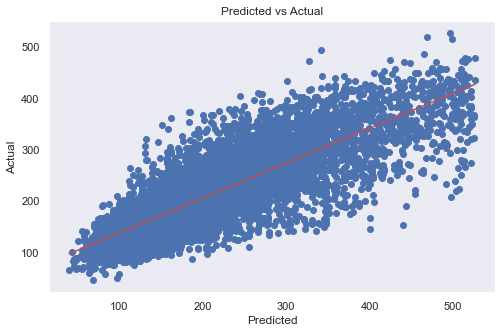

In [52]:
model5 = model_to_use("XGBC")
model5.fit(X_train, y_train)
evaluate(model5)

In [53]:
X_train.shape

(31034, 25)

In [54]:
X_train.columns

Index(['Person Capacity', 'Multiple Rooms', 'Business', 'Bedrooms',
       'City Center (km)', 'Metro Distance (km)', 'Attraction Index',
       'Normalised Attraction Index', 'Restraunt Index',
       'Normalised Restraunt Index', 'Overall Rating', 'City_Athens',
       'City_Barcelona', 'City_Berlin', 'City_Budapest', 'City_Lisbon',
       'City_Paris', 'City_Rome', 'City_Vienna', 'Day_Weekend',
       'Room Type_Private room', 'Room Type_Shared room', 'Shared Room_True',
       'Private Room_True', 'Superhost_True'],
      dtype='object')

In [55]:
X_test

,Person Capacity,Multiple Rooms,Business,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index,...,City_Lisbon,City_Paris,City_Rome,City_Vienna,Day_Weekend,Room Type_Private room,Room Type_Shared room,Shared Room_True,Private Room_True,Superhost_True
0,0.00,1.0,0.0,0.0,0.195686,0.034068,0.055115,0.119946,0.082723,0.260232,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.25,0.0,1.0,0.1,0.293110,0.062250,0.012845,0.015056,0.013206,0.056004,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,0.00,0.0,0.0,0.1,0.125336,0.052028,0.042865,0.101989,0.038307,0.237081,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,1.00,0.0,0.0,0.3,0.081958,0.009365,0.019209,0.029443,0.017560,0.098776,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.00,1.0,0.0,0.1,0.276314,0.032173,0.025576,0.041538,0.030008,0.043039,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,0.50,1.0,0.0,0.2,0.110709,0.043651,0.120208,0.115038,0.169032,0.246021,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
7783,0.50,0.0,1.0,0.1,0.047793,0.070373,0.037245,0.051594,0.084400,0.324669,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7784,0.00,1.0,0.0,0.0,0.147040,0.024146,0.121769,0.267093,0.140001,0.437655,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7785,0.00,0.0,1.0,0.1,0.040660,0.008991,0.050811,0.137690,0.102252,0.613093,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


## Optimization
#### Grid Search

In [56]:
param_grid_decision_tree = {'criterion': ['gini', 'entropy'],  
                            'max_depth': [10,15,20,30,40,50],
                            'min_samples_leaf' : [1,2,5]
                           } 

# Define the parameters gird for random forest
param_grid_random_forest = {'max_depth'   : [10,20,40],
                            'n_estimators' : [100,200,300],
                            'min_samples_leaf' : [1,2,5]        
                           }  

# Define the parameters gird for XGBoost
param_grid_xgb = {'min_child_weight': [1, 5, 10],
                  'gamma': [0, 1],
                  'max_depth': [5,10],
                  'learning_rate' : [0.05,0.1]
                 } 

# Define the parameters gird for LGBM
param_grid_lgbm = {'n_estimator':[100,200],
                   'num_leaves': [256,128],
                   'max_depth': [5, 8, 10],
                   'learning_rate': [0.05, 0.1]
                  }

In [57]:
def param(input_ml_algo):    
    if input_ml_algo == 'DT':
        model       = DecisionTreeClassifier()
        param_grid  = param_grid_decision_tree
    elif input_ml_algo == 'RF':
        model       = RandomForestClassifier()
        param_grid  = param_grid_random_forest
    elif input_ml_algo == 'XGBC':
        model       = XGBClassifier()
        param_grid  = param_grid_xgb
    elif input_ml_algo == 'LGBMC':
        model       = LGBMClassifier()
        param_grid  = param_grid_lgbm
    return param_grid

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
model3

RandomForestRegressor()

In [60]:
model3.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [61]:
grid = GridSearchCV(model3, param_grid_random_forest, refit = True, cv=2) 

In [62]:
grid

GridSearchCV(cv=2, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20, 40],
                         'min_samples_leaf': [1, 2, 5],
                         'n_estimators': [100, 200, 300]})

In [63]:
#grid.fit(X_train, y_train)

In [64]:
#grid.best_params_

In [65]:
model7 = RandomForestRegressor(max_depth=40,min_samples_leaf=2,n_estimators=100)

Train r2 score:  0.9428823141355971
Test r2 score:  0.7499252541538171
train_mse1:  573.1229695130497
test_mse1:  2458.224805015123


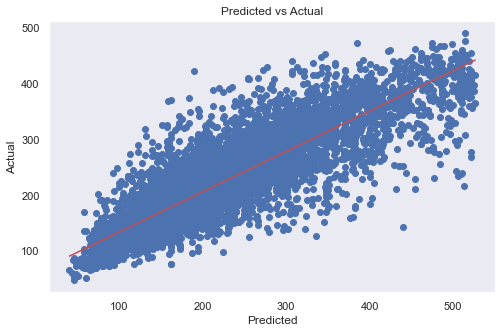

In [66]:
model7.fit(X_train, y_train)
evaluate(model7)

In [67]:
import pickle
from pickle import dump
# save the model
dump(model3, open('RF2_model.pkl', 'wb'))

# save encoder
dump(encoder, open('enc.pkl', 'wb'))

# save scaler
dump(scaler, open('scal2.pkl', 'wb'))

In [68]:
train.columns

Index(['City', 'Price', 'Day', 'Room Type', 'Shared Room', 'Private Room',
       'Person Capacity', 'Superhost', 'Multiple Rooms', 'Business',
       'Cleanliness Rating', 'Guest Satisfaction', 'Bedrooms',
       'City Center (km)', 'Metro Distance (km)', 'Attraction Index',
       'Normalised Attraction Index', 'Restraunt Index',
       'Normalised Restraunt Index', 'Overall Rating'],
      dtype='object')

In [69]:
len(train.columns)

20

In [70]:
train

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index,Overall Rating
0,Lisbon,105.534709,Weekday,Private room,False,True,2.0,False,1,0,9.0,8.0,1,2.432855,0.372176,107.859268,3.560897,280.131751,12.528537,8.5
1,Budapest,148.517178,Weekday,Entire home/apt,False,False,6.0,True,1,0,10.0,10.0,2,0.812401,0.314740,308.499864,18.397297,538.478795,40.775271,10.0
2,Athens,81.081714,Weekday,Entire home/apt,False,False,5.0,False,0,0,9.0,8.9,2,3.569007,0.183870,48.518362,1.829344,71.012747,5.332069,9.0
3,Rome,237.065438,Weekend,Entire home/apt,False,False,6.0,True,0,1,9.0,10.0,3,5.654633,2.831358,205.279193,4.548052,594.676079,12.956549,9.5
4,Rome,194.982816,Weekend,Entire home/apt,False,False,6.0,False,0,1,10.0,9.0,2,5.424464,0.370540,267.029014,5.916146,624.257060,13.601047,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31029,Barcelona,167.803198,Weekday,Private room,False,True,2.0,False,1,0,10.0,8.8,1,0.939441,0.269381,801.292760,27.309350,1498.788137,32.992940,9.4
31030,Budapest,138.647366,Weekend,Entire home/apt,False,False,2.0,True,0,0,10.0,9.8,0,1.515667,0.212149,216.827544,12.941119,344.098122,30.080352,9.9
31031,Lisbon,315.900563,Weekday,Entire home/apt,False,False,6.0,False,1,0,10.0,9.1,2,0.906417,0.579484,211.241397,6.973984,762.471322,34.100563,9.6
31032,Paris,280.548047,Weekend,Entire home/apt,False,False,2.0,False,0,0,9.0,9.3,1,2.131325,0.296881,274.574682,13.351214,701.514432,32.362496,9.2


In [71]:

train['Shared Room'].unique()

array([False,  True])

In [213]:
%%writefile house.py
import streamlit as st 
import numpy as np
import pandas as pd
import pickle 

model = pickle.load(open('RF2_model.pkl', 'rb'))
scaler = pickle.load(open('scal2.pkl', 'rb'))
encoder = pickle.load(open('enc.pkl', 'rb'))

def predict():
    C1,C2 = st.columns(2)
    
    with C1:
        City = st.selectbox("select city",['Lisbon', 'Budapest', 'Athens', 'Rome', 'Paris', 'Berlin',
           'Barcelona', 'Vienna', 'Amsterdam'])
        Day = st.selectbox("Choose Day",['Weekday', 'Weekend'])
        Room = st.selectbox("Room type",['Private room', 'Entire home/apt', 'Shared room'])
        SR = st.selectbox("Shared room",["False",  "True"])
        PR = st.selectbox("Private room",["False",  "True"])
        Person = st.number_input("Number of Persons it can carry")
        SH = st.selectbox("Superhost",["False",  "True"])
        MR = st.selectbox("Multiple Rooms",["False",  "True"])
        if MR == "True":
            MR1 = 1
        else:
            MR1 = 0
            
        B = st.selectbox("Business",["False",  "True"])
        if B == "True":
            Business = 1
        else:
            Business = 0
    
    with C2:
        CR = st.number_input("Clealiness Rating")
        GS = st.number_input("Guest satisfaction rating")
        Bed = st.number_input("Number Of Bedrooms")
        CC = st.number_input("Distance to City Center (Km)")
        MD = st.number_input("Distance to metro (Km)")
        Attr = st.number_input("Attraction Index")
        NAI = st.number_input("Normaliseed Attraction Index")
        RI = st.number_input("Restaurant Index")
        NRI = st.number_input("Normalised Restaurant Index")
        OR = st.number_input("Overall rating")
        
        feat = np.array([City,Day,Room,SR,PR,Person,SH,MR1,Business,
                         CR,GS,Bed,CC,MD,Attr,NAI,RI,NRI,OR]).reshape(1,-1)
        cols= ['City', 'Day', 'Room Type', 'Shared Room', 'Private Room',
               'Person Capacity', 'Superhost', 'Multiple Rooms', 'Business',
               'Cleanliness Rating', 'Guest Satisfaction', 'Bedrooms',
               'City Center (km)', 'Metro Distance (km)', 'Attraction Index',
               'Normalised Attraction Index', 'Restraunt Index',
               'Normalised Restraunt Index', 'Overall Rating']
        feat1 = pd.DataFrame(feat,columns=cols)
        return feat1

frame = predict()

def prepare(d):
    enc_data = pd.DataFrame(encoder.transform(d[['City','Day','Room Type','Shared Room','Private Room','Superhost']]).toarray())
    enc_data.columns = encoder.get_feature_names_out()

    d = d.join(enc_data)

    d.drop(['City','Day','Room Type','Shared Room','Private Room','Superhost'], axis=1,inplace=True)
    
    col2 = d.columns
    
    d = scaler.transform(d)
    
    d = pd.DataFrame(d, columns=col2)
    
    d.drop(['Cleanliness Rating','Guest Satisfaction'],axis=1,inplace=True)
    
    return d




if st.button('Predict'):
    frame2= prepare(frame)
    pred = model.predict(frame2)
    st.write(pred[0])

Overwriting house.py


In [72]:
encoder.categories_

[array(['Amsterdam', 'Athens', 'Barcelona', 'Berlin', 'Budapest', 'Lisbon',
        'Paris', 'Rome', 'Vienna'], dtype=object),
 array(['Weekday', 'Weekend'], dtype=object),
 array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object),
 array([False,  True]),
 array([False,  True]),
 array([False,  True])]